# Principal Component Analysis

- Technique used to reduce dimensions.
- reduce number of features
- model becomes lightweight and faster training and better computational efficiency
- try to identify most important principal components in descending order of their impact on the model decision

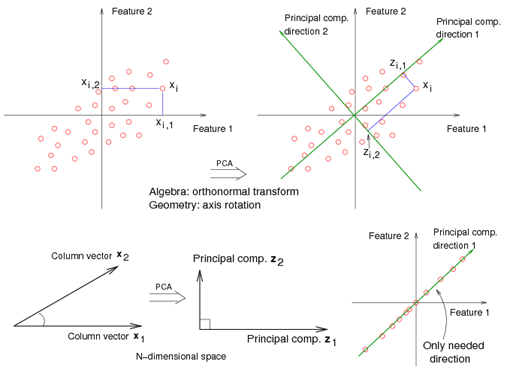

- scale features before applying PCA
- accuracy takes a hit
- resolves dimensionality curse problem 

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [5]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

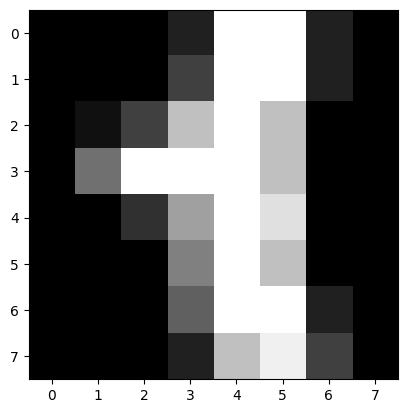

In [10]:
plt.gray()
plt.imshow(digits.images[21])

In [20]:
print("shape = " ,np.shape(digits.data[21])) # 64 rows and 1 column
print("data: \n", digits.data[21])

shape =  (64,)
data: 
 [ 0.  0.  0.  2. 16. 16.  2.  0.  0.  0.  0.  4. 16. 16.  2.  0.  0.  1.
  4. 12. 16. 12.  0.  0.  0.  7. 16. 16. 16. 12.  0.  0.  0.  0.  3. 10.
 16. 14.  0.  0.  0.  0.  0.  8. 16. 12.  0.  0.  0.  0.  0.  6. 16. 16.
  2.  0.  0.  0.  0.  2. 12. 15.  4.  0.]


In [22]:
data_21 = digits.data[21].reshape(8,8) # 8 rows and 8 columns ----> 2 D array
data_21

array([[ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  4., 16., 16.,  2.,  0.],
       [ 0.,  1.,  4., 12., 16., 12.,  0.,  0.],
       [ 0.,  7., 16., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  3., 10., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  2., 12., 15.,  4.,  0.]])

<Figure size 640x480 with 0 Axes>

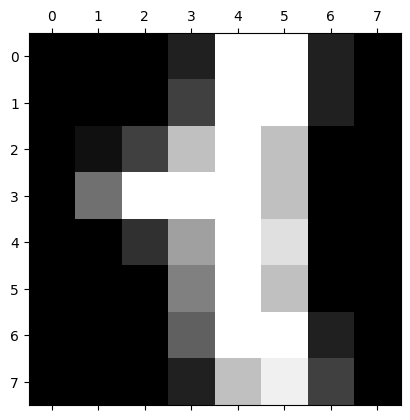

In [23]:
# using plot matshow command
plt.gray()
plt.matshow(data_21)

In [27]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [28]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [32]:
X = df
y = digits.target

scaler = StandardScaler() # standardizing the dataset to create a standard normal dist.
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)